In [2]:
# prediction of market price based on news headlines

In [3]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.7 MB/s eta 0:00:00


In [4]:
# import the libraries
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [5]:
# from google.colab import files
# files.upload()

In [6]:
# upload the files
df1 = pd.read_csv('Combined_News_DJIA.csv')

In [7]:
df2 = pd.read_csv('upload_DJIA_table.csv')

In [8]:
df1.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."


In [9]:
df2.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


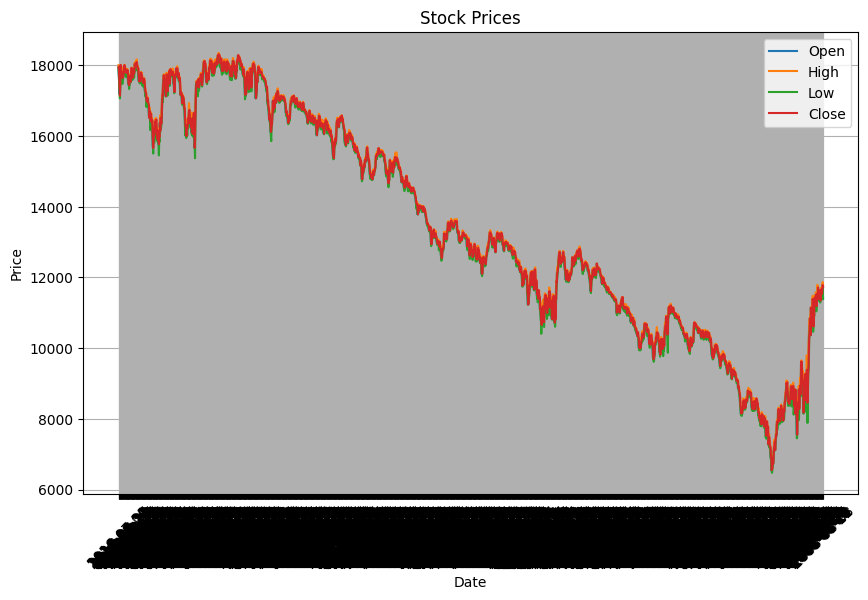

In [10]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df2['Date'], df2['Open'], label='Open')
plt.plot(df2['Date'], df2['High'], label='High')
plt.plot(df2['Date'], df2['Low'], label='Low')
plt.plot(df2['Date'], df2['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


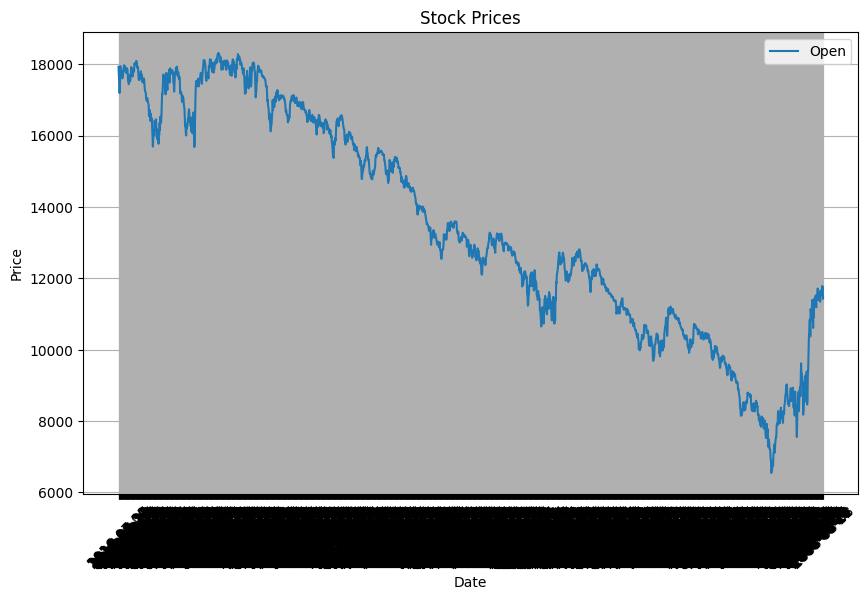

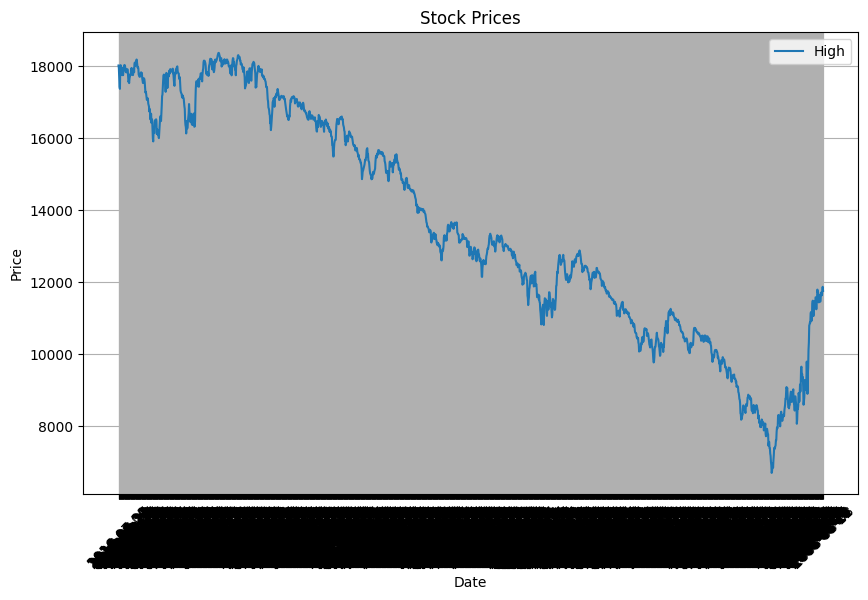

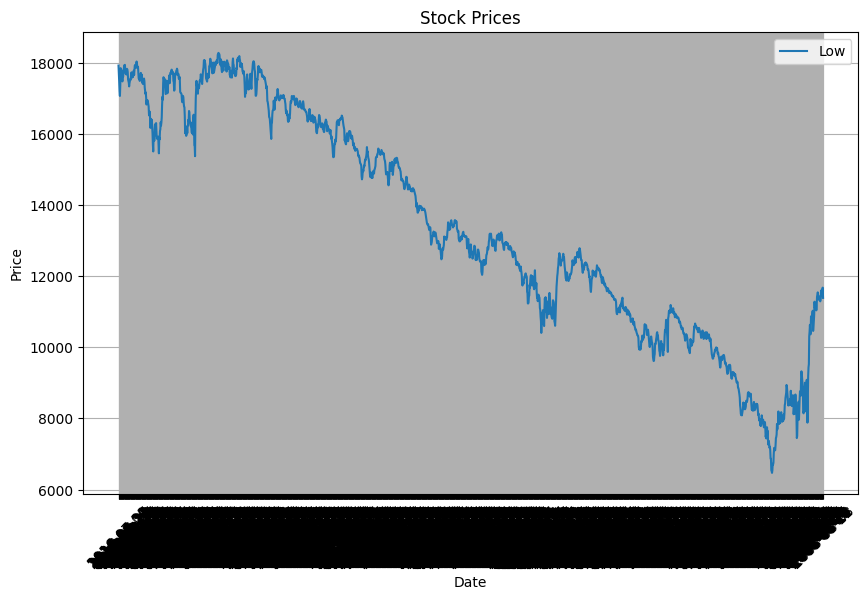

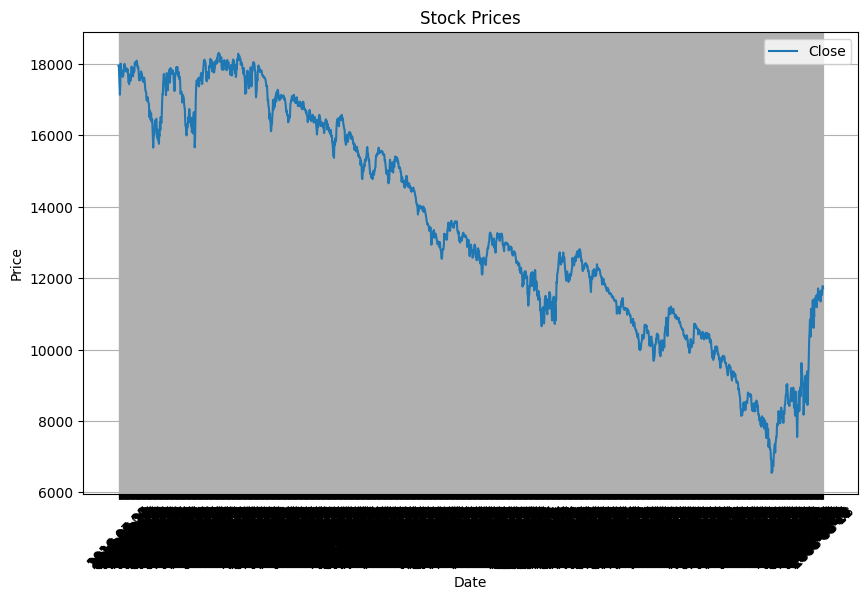

In [11]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df2['Date'], df2['Open'], label='Open')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df2['Date'], df2['High'], label='High')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df2['Date'], df2['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df2['Date'], df2['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [12]:
df1.shape

(1989, 27)

In [13]:
df2.shape

(1989, 7)

In [14]:
# Merge the datasets 
merge = df1.merge(df2, how = 'inner', on='Date')

In [15]:
merge.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


In [16]:
#combining all the news headlines into a single line
headlines = []

for row in range(0, len(merge.index)):
  headlines.append(' '.join( str(x) for x in merge.iloc[row, 2:27]))

headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [17]:
# now we clean the headlines
clean_headlines = []

for i in range(0, len(headlines)):
  clean_headlines.append( re.sub("b[(')]", '', headlines[i])) # remove all the b' with an empty string
  clean_headlines[i] = re.sub('b[(")]', '', clean_headlines[i]) # remove all  the b"
  clean_headlines[i] = re.sub("\'", '', clean_headlines[i]) # remove all  the b"

In [18]:
# a look at the cleaned dataset
clean_headlines[0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

In [19]:
# we add it to our main dataset
merge['combined_news'] = clean_headlines
merge['combined_news']

0       Georgia downs two Russian warplanes as countri...
1       Why wont America and Nato help us? If they won...
2       Remember that adorable 9-year-old who sang at ...
3        U.S. refuses Israel weapons to attack Iran: r...
4       All the experts admit that we should legalise ...
                              ...                        
1984    Barclays and RBS shares suspended from trading...
1985    2,500 Scientists To Australia: If You Want To ...
1986    Explosion At Airport In Istanbul Yemeni former...
1987    Jamaica proposes marijuana dispensers for tour...
1988    A 117-year-old woman in Mexico City finally re...
Name: combined_news, Length: 1989, dtype: object

In [20]:
merge.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,combined_news
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...


In [21]:
# Now a function for subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# And a function for polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [22]:
# Now we create two new columns for subjectivity and polarity

In [23]:
merge['subjectivity'] = merge['combined_news'].apply(getSubjectivity)
merge['polarity'] = merge['combined_news'].apply(getPolarity)

In [24]:
merge.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top25,Open,High,Low,Close,Volume,Adj Close,combined_news,subjectivity,polarity
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...,0.374806,0.121956
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,All the experts admit that we should legalise ...,0.375099,0.040677


In [25]:
# a function to get the sentiment score 
def getSIA(text):      # get subjectivity Intensity Analyzer
   sia = SentimentIntensityAnalyzer()
   sentiment = sia.polarity_scores(text)
   return sentiment

In [26]:
from nltk.stem.snowball import NorwegianStemmer
# get the sentiment scores for each day
compound = []
pos = []
neg = []
neu = []
SIA = 0

for i in range(0, len(merge['combined_news'])):
  SIA = getSIA(merge['combined_news'][i])
  compound.append(SIA['compound'])
  pos.append(SIA['pos'])
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])

In [27]:
# store all these values in the merge dataset
merge['compound'] = compound
merge['positive'] = pos
merge['negative'] = neg
merge['neutral'] = neu

In [28]:
merge.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Close,Volume,Adj Close,combined_news,subjectivity,polarity,compound,positive,negative,neutral
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9982,0.041,0.235,0.724
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9858,0.089,0.191,0.721


In [29]:
# collapsing the dataset
keep_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'subjectivity', 'polarity', 'compound', 'positive', 'negative', 'neutral', 'Label']
df = merge[keep_cols]
df

,Open,High,Low,Close,Volume,subjectivity,polarity,compound,positive,negative,neutral,Label
0,11432.089844,11759.959961,11388.040039,11734.320312,212830000,0.267549,-0.048568,-0.9982,0.041,0.235,0.724,0
1,11729.669922,11867.110352,11675.530273,11782.349609,183190000,0.374806,0.121956,-0.9858,0.089,0.191,0.721,1
2,11781.700195,11782.349609,11601.519531,11642.469727,173590000,0.536234,-0.044302,-0.9715,0.056,0.128,0.816,0
3,11632.809570,11633.780273,11453.339844,11532.959961,182550000,0.364021,0.011398,-0.9809,0.066,0.146,0.788,0
4,11532.070312,11718.280273,11450.889648,11615.929688,159790000,0.375099,0.040677,-0.9882,0.094,0.189,0.717,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1984,17355.210938,17355.210938,17063.080078,17140.240234,138740000,0.352311,-0.014015,-0.9644,0.094,0.148,0.758,0
1985,17190.509766,17409.720703,17190.509766,17409.720703,112190000,0.352649,0.046560,-0.9571,0.102,0.132,0.767,1
1986,17456.019531,17704.509766,17456.019531,17694.679688,106380000,0.389617,0.052622,-0.9975,0.091,0.225,0.684,1
1987,17712.759766,17930.609375,17711.800781,17929.990234,133030000,0.382566,0.011243,-0.9977,0.061,0.202,0.738,1


In [30]:
X = df
X = np.array(X.drop(['Label'], 1))
# Create the target dataset
y = np.array(df['Label'])

<ipython-input-30-6c954b95dc95>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(X.drop(['Label'], 1))


In [31]:
y

array([0, 1, 0, ..., 1, 1, 1])

In [32]:
# split the data for training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
# Train and predict
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [34]:
predictions = LDA.predict(X_test)

In [35]:
predictions

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

In [36]:
y_test

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,

In [37]:
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       193
           1       0.86      0.97      0.91       205

    accuracy                           0.90       398
   macro avg       0.91      0.90      0.90       398
weighted avg       0.91      0.90      0.90       398



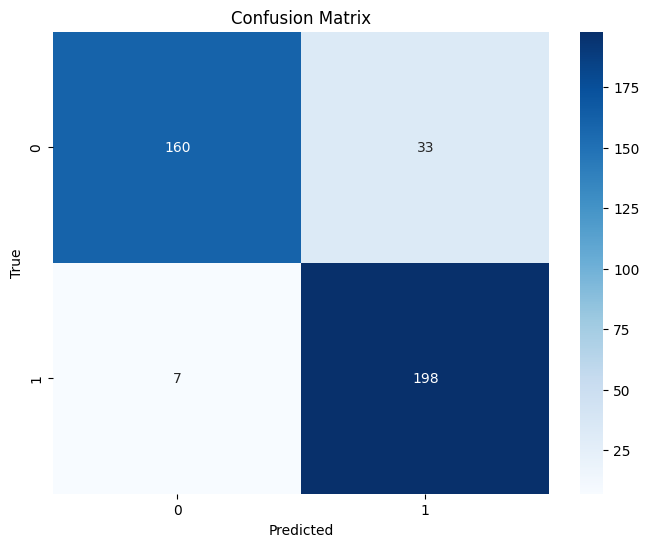

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()